# Problem Statement

In [980]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [981]:
weather=pd.read_csv('D:\Data Science & AI\Praxis Data Science\Python\weatherAUS.csv',sep=',')

# Overall view of the dataset

In [982]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0
1,07-03-2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2
3,03-04-2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0
4,09-09-2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4


In [983]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [984]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,36543.000000,36639.000000,36255.000000,24035.000000,23317.000000,33520.000000,36219.000000,36235.000000,36311.000000,36370.000000,33309.000000,33329.000000,24381.000000,23899.000000,36394.000000,36437.000000,36261.000000
mean,12.235966,22.939491,2.554823,5.189544,7.544688,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.905688,21.485808,2.554748
std,6.389832,6.988266,9.081329,3.765427,3.833809,13.550613,8.997003,8.791849,18.300754,20.317082,7.177877,7.077594,2.848750,2.663067,6.428328,6.820848,8.940267
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,0.000000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,58.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000,0.000000
50%,12.100000,22.300000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000,0.000000
75%,17.000000,27.900000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000,0.800000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,367.600000


In [985]:
weather.describe(exclude='number')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,36881,36881,33513,34072,35919,36255
unique,1473,46,16,16,16,2
top,03-03-2009,Canberra,SE,N,SE,No
freq,42,1085,2403,2862,2939,27756


# Checking no of records and dimension of the dataset

In [986]:
weather.shape

(36881, 23)

# Datatype of the available features

In [987]:
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
dtype: object

In [988]:
weather.nunique()

Date             1473
Location           46
MinTemp           369
MaxTemp           470
Rainfall          432
Evaporation       215
Sunshine          144
WindGustDir        16
WindGustSpeed      64
WindDir9am         16
WindDir3pm         16
WindSpeed9am       39
WindSpeed3pm       39
Humidity9am        99
Humidity3pm       100
Pressure9am       509
Pressure3pm       503
Cloud9am           10
Cloud3pm            9
Temp9am           400
Temp3pm           469
RainToday           2
RISK_MM           430
dtype: int64

# Defining Problem & Identitfy Target Variable

# Exploratory Data Analysis

C:\Users\dipam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RISK_MM', ylabel='Density'>

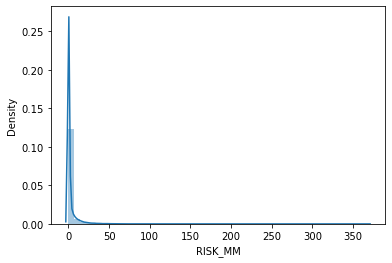

In [989]:
sns.distplot(weather['RISK_MM'])

In [990]:
##Highly positive skewed

## Checking distribution for quantitative columns

In [991]:
#checking distribution for all quantitative variables
continous_column=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed','RISK_MM',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'RISK_MM'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>],
       [<AxesSubplot:title={'center':'WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>],
       [<AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>],
       [<AxesSubplot:title={'center':'Temp3pm'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

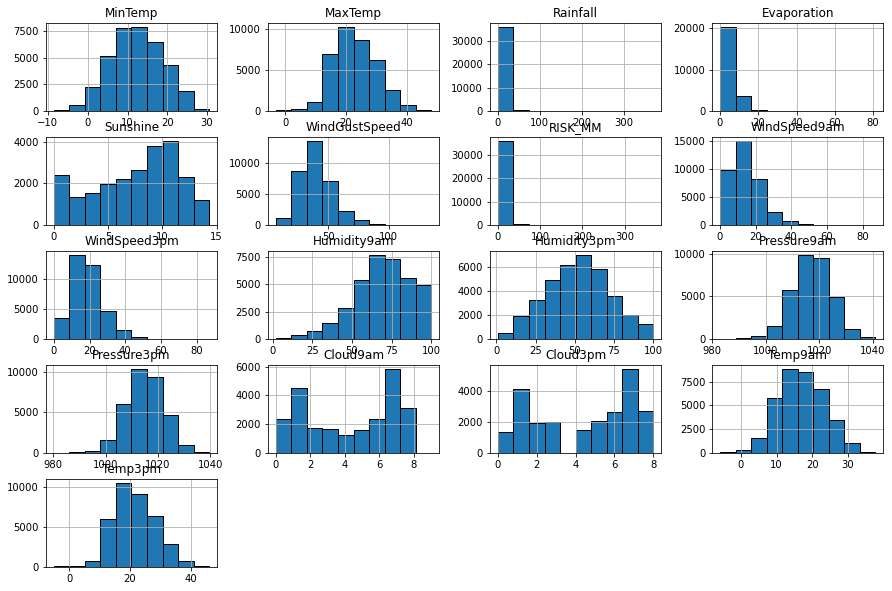

In [992]:
weather.hist(continous_column,figsize=(15,10),edgecolor='black')

Almost every quantitative variable showing normal distributuion expect Evaporation and Rainfall Having highly skewed feature

## Barplot for checking most no of occured values in categorical feature

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

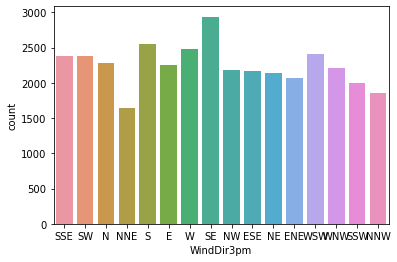

In [993]:
sns.countplot(x=weather['WindDir3pm'])

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

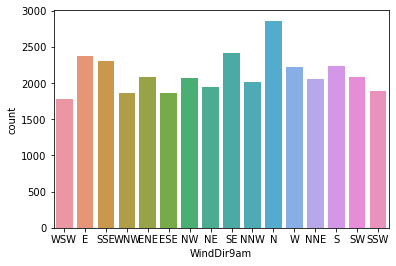

In [994]:
sns.countplot(x=weather['WindDir9am'])

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

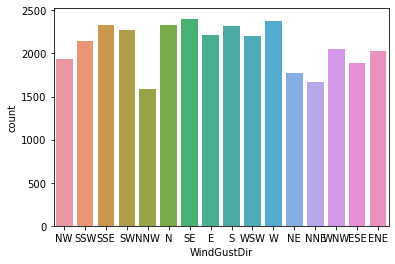

In [995]:
sns.countplot(x=weather['WindGustDir'])

## Skewness

In [996]:
 weather.skew(axis=0,skipna=True)

C:\Users\dipam\AppData\Local\Temp\ipykernel_13792\1693154832.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather.skew(axis=0,skipna=True)


MinTemp          -0.009799
MaxTemp           0.206746
Rainfall         10.626797
Evaporation       2.897319
Sunshine         -0.463194
WindGustSpeed     0.898002
WindSpeed9am      0.780412
WindSpeed3pm      0.579725
Humidity9am      -0.461568
Humidity3pm       0.020390
Pressure9am      -0.119386
Pressure3pm      -0.066764
Cloud9am         -0.195121
Cloud3pm         -0.234955
Temp9am           0.064894
Temp3pm           0.237097
RISK_MM          10.073242
dtype: float64

In [997]:
#As observed previous from the histogram we have high skewness in 3 features including target variable.
#Though evaporation is under +3 range we can neglect it for now,for others we need to transform it.

In [998]:
# weather['RISK_MM'].min()
# weather['Rainfall'].min()

In [999]:
# weather['Rainfall']=np.log(weather['Rainfall']+1)
# weather['RISK_MM']=np.log(weather['RISK_MM']+1)
# weather['Evaporation']=np.log(weather['Evaporation']+1)

In [1000]:
weather['Rainfall']=np.sqrt(weather['Rainfall'])
weather['RISK_MM']=np.sqrt(weather['RISK_MM'])
weather['Evaporation']=np.sqrt(weather['Evaporation'])

In [1001]:
 weather.skew(axis=0,skipna=True)

C:\Users\dipam\AppData\Local\Temp\ipykernel_13792\1693154832.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather.skew(axis=0,skipna=True)


MinTemp         -0.009799
MaxTemp          0.206746
Rainfall         2.857060
Evaporation      0.441319
Sunshine        -0.463194
WindGustSpeed    0.898002
WindSpeed9am     0.780412
WindSpeed3pm     0.579725
Humidity9am     -0.461568
Humidity3pm      0.020390
Pressure9am     -0.119386
Pressure3pm     -0.066764
Cloud9am        -0.195121
Cloud3pm        -0.234955
Temp9am          0.064894
Temp3pm          0.237097
RISK_MM          2.811358
dtype: float64

In [1002]:
#weather.hist(continous_column,figsize=(15,10))

In [1003]:
#sns.distplot(weather['RISK_MM'])

## Duplicates

In [1004]:
weather.drop_duplicates(inplace=True)
duplicates=weather.duplicated().sum()
print('No of duplicates found :',duplicates)

No of duplicates found : 0


## Missing Values

In [1005]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
dtype: int64

In [1006]:
weather.dropna(inplace=True)

In [1007]:
weather.shape

(17378, 23)

In [1008]:
#weather['Sunshine']=weather['Sunshine'].fillna(value=weather['Sunshine'].mode())

In [1009]:
#  continous_column4=weather.select_dtypes(exclude='object')

In [1010]:
# for i in continous_column4:
#     weather[i]=weather[i].fillna(value=weather[i].median())

In [1011]:
#  continous_column5=weather.select_dtypes(include='object')

In [1012]:
# for i in continous_column4:
#     weather[i]=weather[i].fillna(value=weather[i].median())

## Box plot for checking distribution and outlier checking

In [1013]:
weather['MinTemp']=weather['MinTemp'].astype(np.float64)

In [1014]:
c1=weather[['MinTemp', 'MaxTemp','Sunshine']]

<AxesSubplot:>

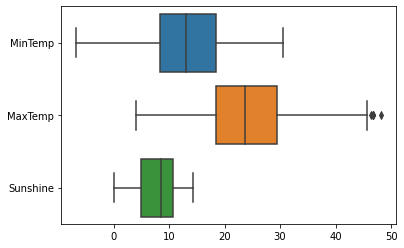

In [1015]:
sns.boxplot(data=c1,orient='hue')

<AxesSubplot:>

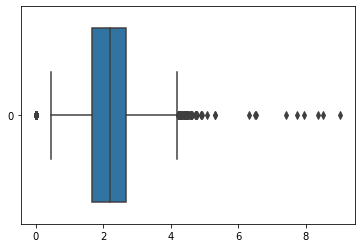

In [1016]:
sns.boxplot(data=weather['Evaporation'],orient='hue')

<AxesSubplot:>

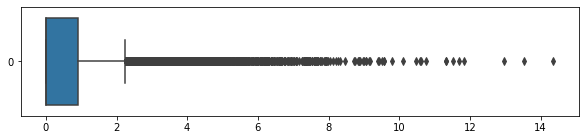

In [1017]:
plt.figure(figsize=(10,2))
sns.boxplot(data=weather['Rainfall'],orient='hue')

In [1018]:
c2=weather[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']]

<AxesSubplot:>

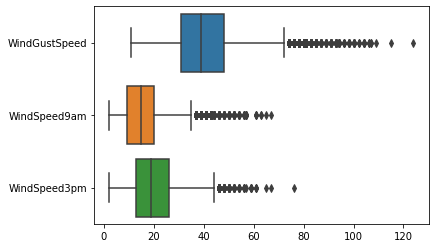

In [1019]:
sns.boxplot(data=c2,orient='hue')

In [1020]:
c3=weather[['Humidity9am', 'Humidity3pm']]

<AxesSubplot:>

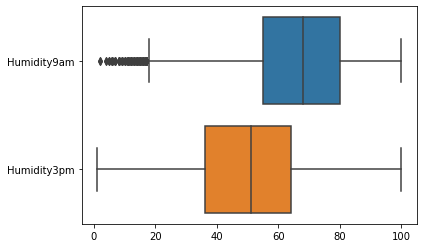

In [1021]:
sns.boxplot(data=c3,orient='hue')

In [1022]:
c4=weather[['Pressure9am', 'Pressure3pm']]

<AxesSubplot:>

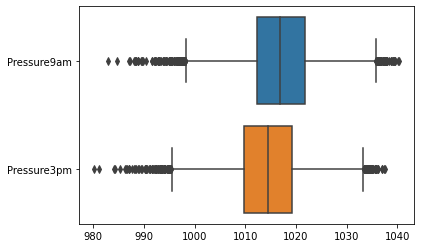

In [1023]:
sns.boxplot(data=c4,orient='hue')

In [1024]:
c5=weather[['Cloud9am', 'Cloud3pm']]

<AxesSubplot:>

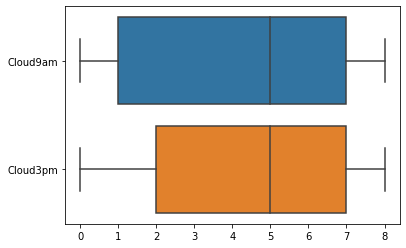

In [1025]:
sns.boxplot(data=c5,orient='hue')

In [1026]:
c6=weather[['Temp9am','Temp3pm']]

<AxesSubplot:>

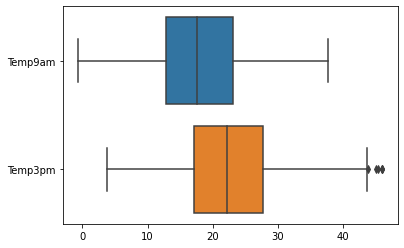

In [1027]:
sns.boxplot(data=c6,orient='hue')

Plethora of outliers present in various features therefore we need to treat them.

## Outliers treatment

We can impute outliers in various way like mean/median imputation,Winsorization, Turkey's hinge method. Here we are treating the outliers with Turkey's hinge method. Tukey's hinge method is a type of data transformation technique that involves Winsorizing a dataset at the 25th and 75th percentiles, also known as the hinges. The goal of Tukey's hinge method is to reduce the impact of outliers while preserving the central tendency and spread of the dataset.

In [1028]:
new_df = weather.copy()
for i in continous_column:
    q1 = np.percentile(weather[i], 25)
    q3 = np.percentile(weather[i], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    new_df[i] = np.where(new_df[i] > upper_bound, upper_bound,np.where(new_df[i] < lower_bound,lower_bound,new_df[i]))

In [1029]:
# new_dff = weather.copy()
# for i in continous_column:
#     q1 = np.percentile(weather[i], 25)
#     q3 = np.percentile(weather[i], 75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     outlier_mask = (new_dff[i] > upper_bound) | (new_dff[i] < lower_bound)
#     new_dff = new_dff.loc[~outlier_mask]

# drop the outliers from the original 'weather' DataFrame
# weather.drop(new_dff.index, inplace=True)

In [1030]:
#new_df.drop('Date',axis=1,inplace=True)

In [1031]:
#new_df.columns

<AxesSubplot:>

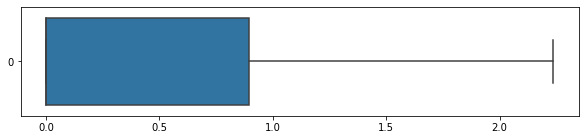

In [1032]:
plt.figure(figsize=(10,2))
sns.boxplot(data=new_df['Rainfall'],orient='hue')

<AxesSubplot:>

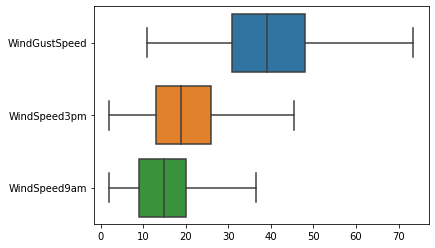

In [1033]:
sns.boxplot(data=new_df[['WindGustSpeed','WindSpeed3pm','WindSpeed9am']],orient='hue')

## Bivariate Analysis

In [1034]:
new_df['RISK_MM']

0        0.000000
2        0.447214
3        0.000000
5        2.236068
6        0.447214
           ...   
36876    2.236068
36877    0.000000
36878    0.000000
36879    0.000000
36880    0.000000
Name: RISK_MM, Length: 17378, dtype: float64

<AxesSubplot:xlabel='Sunshine', ylabel='RISK_MM'>

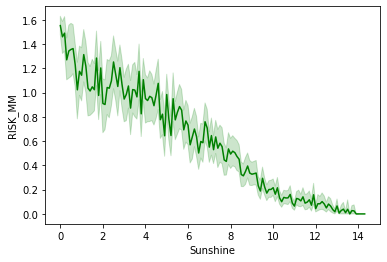

In [1035]:
#Sunshine vs Rainfall:
sns.lineplot(data=new_df,x='Sunshine',y='RISK_MM',color='green')

In [1037]:
continous_column3=new_df.select_dtypes(include='float64').T.index

<AxesSubplot:xlabel='MinTemp', ylabel='RISK_MM'>

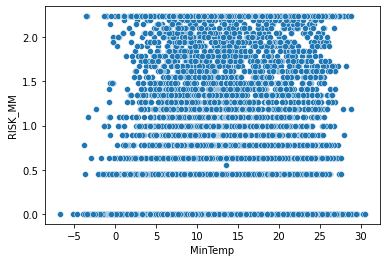

In [1038]:
sns.scatterplot(data=new_df,x='MinTemp',y='RISK_MM')

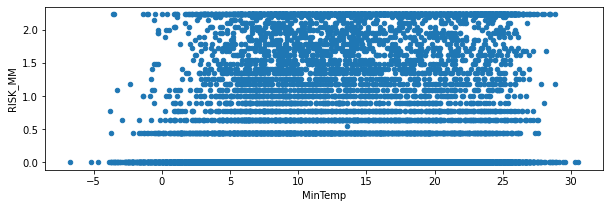

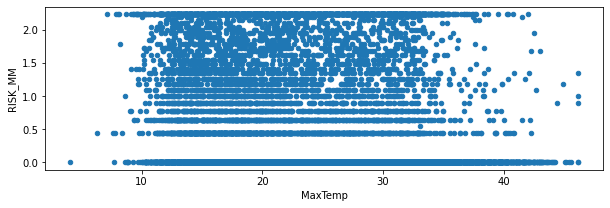

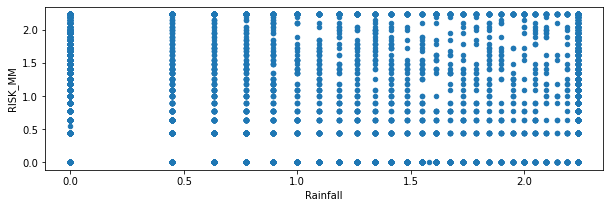

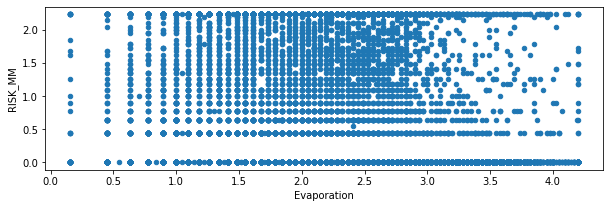

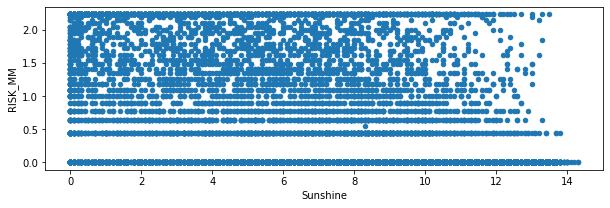

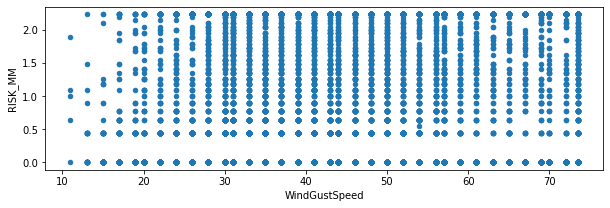

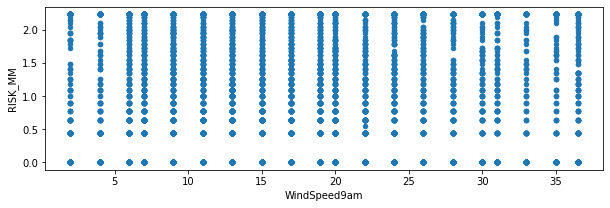

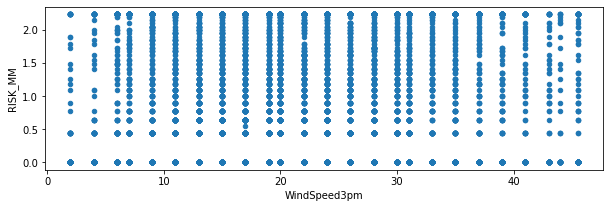

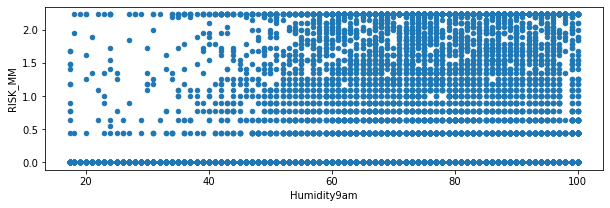

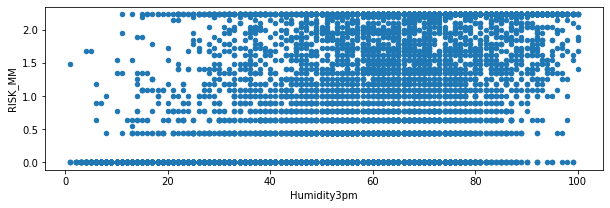

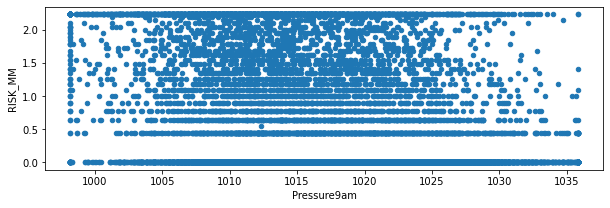

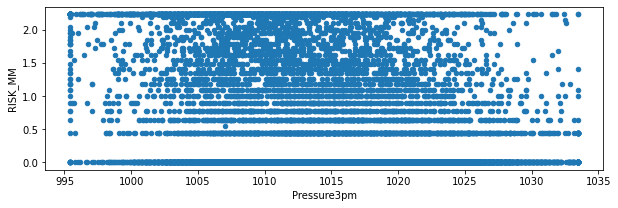

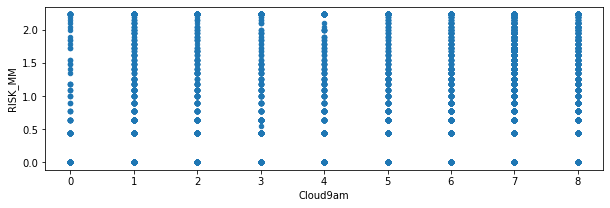

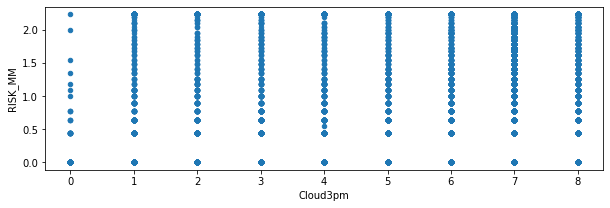

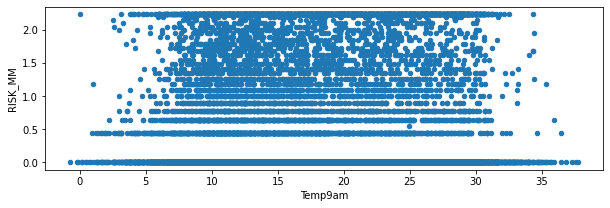

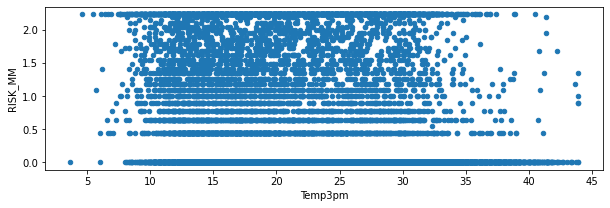

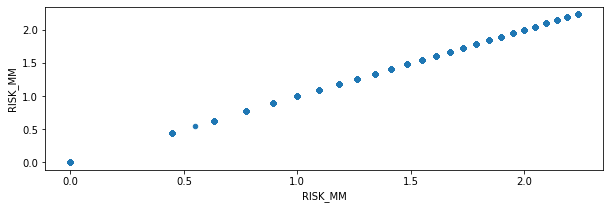

In [1039]:
for i in continous_column3:
    new_df.plot.scatter(x=i,y='RISK_MM',figsize=(10,3))

## Checking Correlation

In [1040]:
corr=weather[continous_column].corr()

In [1041]:
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RISK_MM,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.763888,0.122795,0.561835,0.047239,0.141966,0.160718,0.138253,0.138547,-0.179027,0.077656,-0.472448,-0.488418,0.129185,0.078958,0.912905,0.739765
MaxTemp,0.763888,1.000000,-0.143635,0.699288,0.438527,0.056287,-0.076883,0.002178,0.007529,-0.478424,-0.423670,-0.344072,-0.437065,-0.247048,-0.230439,0.894646,0.984851
Rainfall,0.122795,-0.143635,1.000000,-0.188078,-0.347948,0.134458,0.403007,0.070781,0.072165,0.387645,0.400686,-0.242342,-0.177001,0.320733,0.286371,-0.020175,-0.152575
Evaporation,0.561835,0.699288,-0.188078,1.000000,0.385645,0.226805,-0.097791,0.189081,0.133124,-0.577534,-0.421148,-0.301893,-0.334954,-0.207671,-0.201911,0.645801,0.680178
Sunshine,0.047239,0.438527,-0.347948,0.385645,1.000000,-0.047451,-0.467802,-0.025260,0.013541,-0.503805,-0.641321,0.065188,0.009411,-0.691323,-0.707511,0.256747,0.465205
WindGustSpeed,0.141966,0.056287,0.134458,0.226805,-0.047451,1.000000,0.211088,0.610146,0.678336,-0.195835,-0.033805,-0.430229,-0.385993,0.081655,0.127538,0.107388,0.017846
RISK_MM,0.160718,-0.076883,0.403007,-0.097791,-0.467802,0.211088,1.000000,0.075115,0.066520,0.289464,0.477193,-0.262090,-0.250740,0.340435,0.396944,0.054599,-0.115669
WindSpeed9am,0.138253,0.002178,0.070781,0.189081,-0.025260,0.610146,0.075115,1.000000,0.496959,-0.237713,-0.033520,-0.213096,-0.166751,0.045899,0.078667,0.080200,-0.009274
WindSpeed3pm,0.138547,0.007529,0.072165,0.133124,0.013541,0.678336,0.066520,0.496959,1.000000,-0.086562,0.056057,-0.276105,-0.235249,0.072547,0.048819,0.112149,-0.015673
Humidity9am,-0.179027,-0.478424,0.387645,-0.577534,-0.503805,-0.195835,0.289464,-0.237713,-0.086562,1.000000,0.678540,0.100109,0.152523,0.453806,0.352513,-0.414297,-0.475573


## Heatmap

<AxesSubplot:>

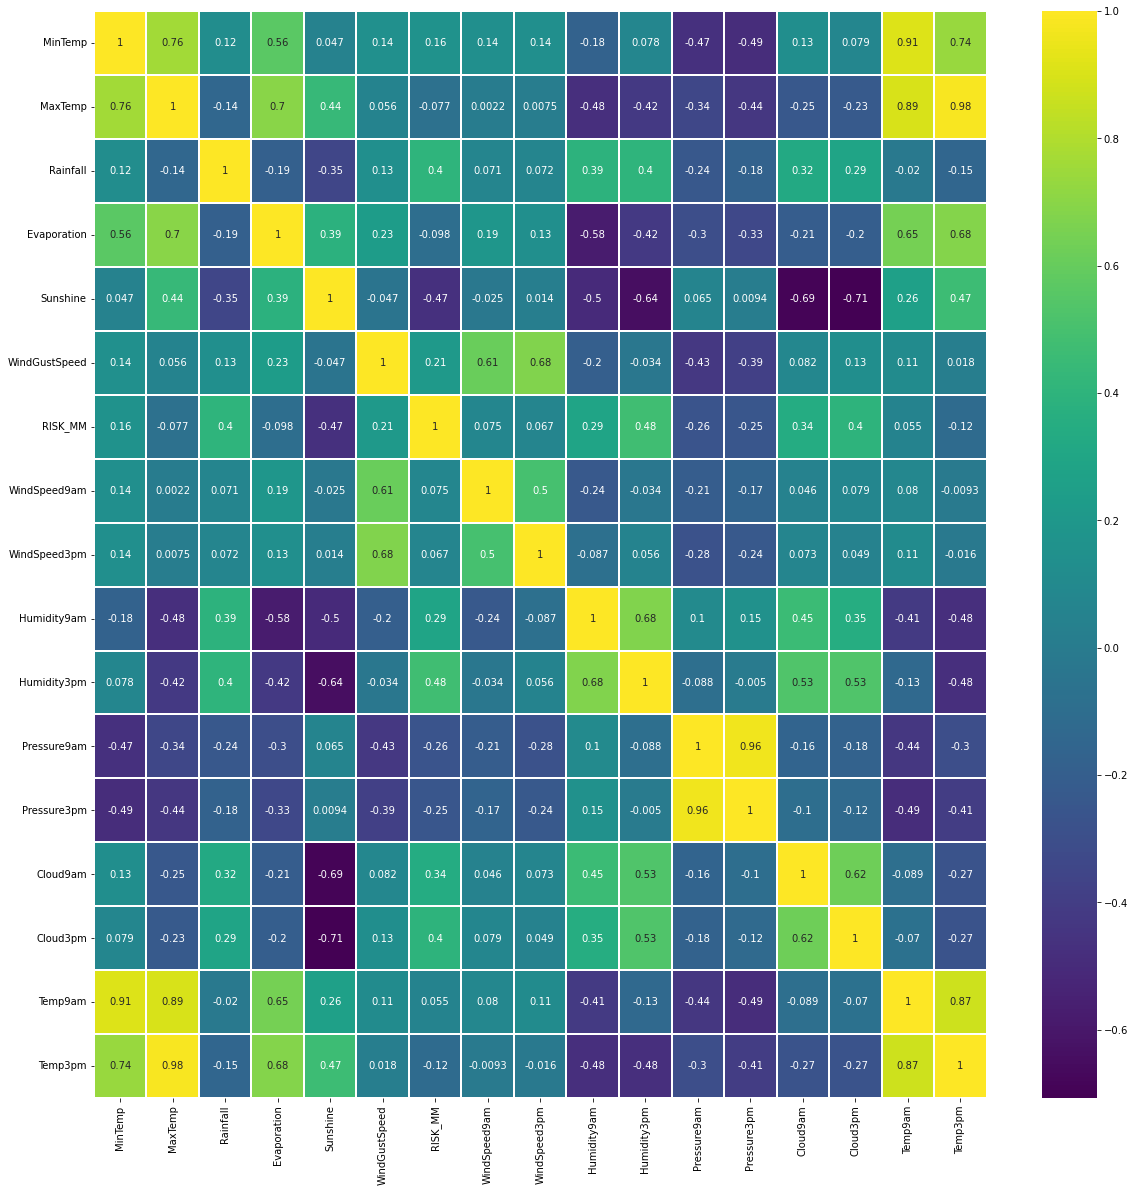

In [1042]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='viridis',annot=True,linewidth=2)

Multicolinearity Present between lots of numeric features like Pressure3pm VS Pressure9am

## Feature Construction

In [1043]:
new_df['Date']=pd.to_datetime(new_df['Date'])
new_df['Year'] = new_df['Date'].dt.year
new_df['Month'] = new_df['Date'].dt.month
new_df['Day'] = new_df['Date'].dt.day

In [1045]:
new_df.drop(['Date'],axis=1,inplace=True)

# Feature Scaling

In [1050]:
def min_max_normalization(data):
    min_val = float(min(data))
    max_val = float(max(data))
    normalized = [(float(val) - min_val) / (max_val - min_val) for val in data]
    return normalized

In [1051]:
new_df2=new_df.copy()

In [1052]:
new_df2.drop(['RISK_MM'],axis=1,inplace=True)

In [1053]:
weather_normalized = new_df2.apply(lambda x: min_max_normalization(x) if x.dtype != 'object' else x)

In [1054]:
weather_normalized.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Hobart,0.317204,0.242568,0.0,0.292898,0.622378,NW,0.304,WSW,SSE,...,0.662234,0.703947,0.125,0.125,0.255208,0.239103,No,0.4,0.363636,0.566667
2,Williamtown,0.709677,0.525565,0.0,0.625000,0.503497,SSE,0.480,SSE,SSE,...,0.603723,0.696053,0.750,0.500,0.609375,0.515567,No,0.6,0.090909,0.566667
3,PerthAirport,0.626344,0.568371,0.0,0.703399,0.790210,SW,0.688,SSE,SW,...,0.534574,0.511842,0.750,0.125,0.539062,0.557908,No,0.6,0.181818,0.100000
5,Mildura,0.602151,0.551724,0.0,0.789204,0.391608,N,0.864,ENE,SW,...,0.101064,0.001316,1.000,0.875,0.489583,0.368618,No,0.8,0.727273,0.900000
6,Nuriootpa,0.443548,0.470868,0.0,0.480028,0.734266,SE,0.384,ENE,NNE,...,0.521277,0.485526,0.375,0.500,0.421875,0.480697,No,0.8,0.818182,0.400000


In [1055]:
weather_normalized.shape

(17378, 24)

# Creating dummies for categorical variables

In [1058]:
weather_normalized=pd.get_dummies(weather_normalized,drop_first=True)

In [1059]:
weather_normalized.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.317204,0.242568,0.0,0.292898,0.622378,0.304,0.144928,0.091954,0.575758,0.464646,...,0,0,0,1,0,0,0,0,0,0
2,0.709677,0.525565,0.0,0.625000,0.503497,0.480,0.492754,0.666667,0.369697,0.494949,...,0,0,0,1,0,0,0,0,0,0
3,0.626344,0.568371,0.0,0.703399,0.790210,0.688,0.753623,0.712644,0.393939,0.404040,...,0,0,0,0,0,1,0,0,0,0
5,0.602151,0.551724,0.0,0.789204,0.391608,0.864,0.260870,0.252874,0.515152,0.858586,...,0,0,0,0,0,1,0,0,0,0
6,0.443548,0.470868,0.0,0.480028,0.734266,0.384,0.376812,0.252874,0.430303,0.282828,...,0,0,0,0,0,0,0,0,0,0


In [1060]:
#weather_normalized.drop('month',axis=1,inplace=True)

In [1061]:
weather_normalized.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Darwin', 'Location_Hobart',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Sale', 'Location_Sydney',
       'Location_SydneyAirport', 'Location_Townsville', 'Location_WaggaWagga',
       'Location_Watsonia', 'Location_Williamtown', 'Location_Woomera',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustD

# Spilitting data into train and test

In [1062]:
features=weather_normalized
target=new_df['RISK_MM']
X_train=features
y_train=target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=20)

# Decision Tree

In [1063]:
from sklearn.tree import DecisionTreeRegressor
weather_tree= DecisionTreeRegressor(max_depth=18,random_state=26,max_features=28)

In [1064]:
weather_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=18, max_features=28, random_state=26)

In [1065]:
y_train_predict=weather_tree.predict(X_train)

In [1066]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_train_predict,y_train)
r2=r2_score(y_train,y_train_predict)
print(r2)

0.9551057397859242


In [1067]:
# Finding optimal max_depth
r2score_val_list = [] #to store r2_score values for different k
for max_dep in range(25):
    max_dep = max_dep +1
    model = DecisionTreeRegressor(max_depth=max_dep,random_state=26)

    model.fit(X_train, y_train)  #fit the model
    y_pred = model.predict(X_test) #make prediction on test set
    r2score = r2_score(y_test, y_pred) #calculate r2_score
    print('r2_score value for max_depth= ' , max_dep , 'is:', r2score)
    
    
    r2score_val_list.append(r2score) #store r2_score values
    
print("The maximum r2_score we get is ", max(r2score_val_list))
print("The corresponding max_depth value is ", 1+r2score_val_list.index(max(r2score_val_list)))

r2_score value for max_depth=  1 is: 0.264884108009956
r2_score value for max_depth=  2 is: 0.35769675820143576
r2_score value for max_depth=  3 is: 0.3962635183339104
r2_score value for max_depth=  4 is: 0.42051390447260917
r2_score value for max_depth=  5 is: 0.4298705813267373
r2_score value for max_depth=  6 is: 0.43308342161741387
r2_score value for max_depth=  7 is: 0.41045872523822047
r2_score value for max_depth=  8 is: 0.3820558406649819
r2_score value for max_depth=  9 is: 0.34197233552419315
r2_score value for max_depth=  10 is: 0.30109055874287294
r2_score value for max_depth=  11 is: 0.25779299805155964
r2_score value for max_depth=  12 is: 0.1992370950695177
r2_score value for max_depth=  13 is: 0.1529562826460702
r2_score value for max_depth=  14 is: 0.12206131649081287
r2_score value for max_depth=  15 is: 0.09331108792362608
r2_score value for max_depth=  16 is: 0.06491217376795111
r2_score value for max_depth=  17 is: 0.021273046116740857
r2_score value for max_depth=

In [1068]:
weather_tree= DecisionTreeRegressor(max_depth=6,random_state=26)

In [1069]:
weather_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=26)

In [1070]:
y_test_predict=weather_tree.predict(X_test)

In [1071]:
from sklearn.metrics import mean_squared_error, r2_score
meansqrd=mean_squared_error(y_test_predict,y_test)
rsqrd=r2_score(y_test,y_test_predict)
print(rsqrd)

0.43308342161741387


# MLR

In [1076]:
from sklearn import linear_model
regModel2 = linear_model.LinearRegression()
regModel2.fit(X_train,y_train)
MLR_train_predict = regModel2.predict(X_train)
from sklearn.metrics import mean_squared_error, r2_score
r2=r2_score(y_train,MLR_train_predict)
print(r2)

0.4744792216195658


In [1077]:
MLR_test_predict = regModel2.predict(X_test)
r2=r2_score(y_test,MLR_test_predict)
r2

0.45680779055304566

# KNN

In [1078]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
yknn=knn.fit(X_train, y_train)
yknn_predict=yknn.predict(X_train)
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_train,yknn_predict))
print(r2_score(y_train,yknn_predict))

0.3180987069436286
0.5193455245679208


In [1079]:
r2score_val_list = [] #to store r2_score values for different k
for K in range(50):
    
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred = model.predict(X_test) #make prediction on test set
    r2score = r2_score(y_test, y_pred) #calculate r2_score
    print('r2_score value for k= ' , K , 'is:', r2score)
    
    r2score_val_list.append(r2score) #store r2_score values
    
print("The maximum r2_score we get is ", max(r2score_val_list))
print("The corresponding K value is ", 1+r2score_val_list.index(max(r2score_val_list)))

r2_score value for k=  1 is: -0.13987379671606837
r2_score value for k=  2 is: 0.11250428951761315
r2_score value for k=  3 is: 0.20274725910782032
r2_score value for k=  4 is: 0.2522636462477106
r2_score value for k=  5 is: 0.2651593163841778
r2_score value for k=  6 is: 0.2875236471347884
r2_score value for k=  7 is: 0.29701196861733326
r2_score value for k=  8 is: 0.3038511718070238
r2_score value for k=  9 is: 0.3071226691072493
r2_score value for k=  10 is: 0.31258915755199934
r2_score value for k=  11 is: 0.31620779689686973
r2_score value for k=  12 is: 0.32209088114165807
r2_score value for k=  13 is: 0.3243399199238549
r2_score value for k=  14 is: 0.32337017780692956
r2_score value for k=  15 is: 0.3231909368024867
r2_score value for k=  16 is: 0.32558618277132845
r2_score value for k=  17 is: 0.32379029826951755
r2_score value for k=  18 is: 0.3277489197784522
r2_score value for k=  19 is: 0.32861294274969166
r2_score value for k=  20 is: 0.3299464863966648
r2_score value fo

In [1080]:
model = KNeighborsRegressor(n_neighbors = 48)
model.fit(X_train, y_train)  #fit the model
y_pred = model.predict(X_test) #make prediction on test set
r2score = r2_score(y_test, y_pred)
print(r2score)

0.34818160813901544
